## 2 Axes Twining

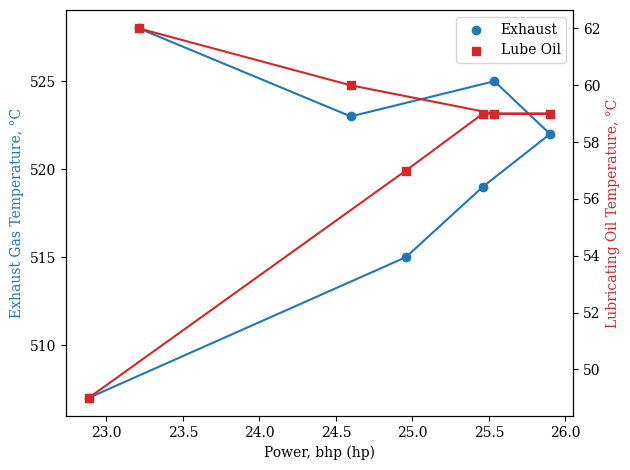

In [17]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif']

# Data
bhp = np.array([22.8839779, 24.95764273, 25.46040516, 25.89963168,
                25.5359116, 24.59668508, 23.21392265], dtype=float)
bsfc = np.array([305.4059639, 267.8106022, 261.9206271, 250.8119081,
                 246.5689846, 244.1517062, 243.2354142], dtype=float)
torque = np.array([49.85319, 57.72475, 65.5963, 72.15593, 78.71556,
                   83.4385, 87.63666], dtype=float)
speed = np.array([3270, 3080, 2765, 2557, 2311, 2100, 1887])

T_l = np.array([49, 57, 59, 59, 59, 60, 62], dtype=float)
T_e = np.array([507, 515, 519, 522, 525, 523, 528], dtype=float)

filename = 'exhaust_lube_vs_power.png'

x=bhp
y1=T_e
y2=T_l


# Curve fits (2nd degree polynomial)c v
coeffs_y1 = np.polyfit(x, y1, 5)
coeffs_y2 = np.polyfit(x, y2, 5)


poly_y1 = np.poly1d(coeffs_y1)
poly_y2 = np.poly1d(coeffs_y2)


# Fine Q for smooth curves
x_fit = np.linspace(np.floor(x.min()), np.ceil(x.max()), 200)

# Create figure and axes
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

# Plot data points
ax1.scatter(x, y1, color='tab:blue', marker='o', label='Exhaust')
ax2.scatter(x, y2, color='tab:red', marker='s', label='Lube Oil')

# plot unfitted 
ax1.plot(x, y1, color='tab:blue', linestyle='-')
ax2.plot(x, y2, color='tab:red', linestyle='-')

# Plot fitted curves
# ax1.plot(x_fit, poly_y1(x_fit), color='tab:blue', linestyle='-')
# ax2.plot(x_fit, poly_y2(x_fit), color='tab:green', linestyle='-')

# Labels
ax1.set_xlabel('Power, bhp (hp)')
ax1.set_ylabel('Exhaust Gas Temperature, °C', color='tab:blue')
ax2.set_ylabel('Lubricating Oil Temperature, °C', color='tab:red')

# Legends
lines = []
labels = []
for ax in [ax1, ax2]:
    l, lbl = ax.get_legend_handles_labels()
    lines += l
    labels += lbl
ax1.legend(lines, labels, loc='best')

# # Add Gridlines
# plt.grid(which='both', axis='both', linestyle='-', linewidth=0.5)

# plt.title('H, Pout, and Efficiency vs Q with Curve Fits')
plt.tight_layout()
plt.savefig(filename, dpi=600)
plt.show()


## 3 Axes Twining

Eff Maximum at x = 161.0954, y = 41.0525


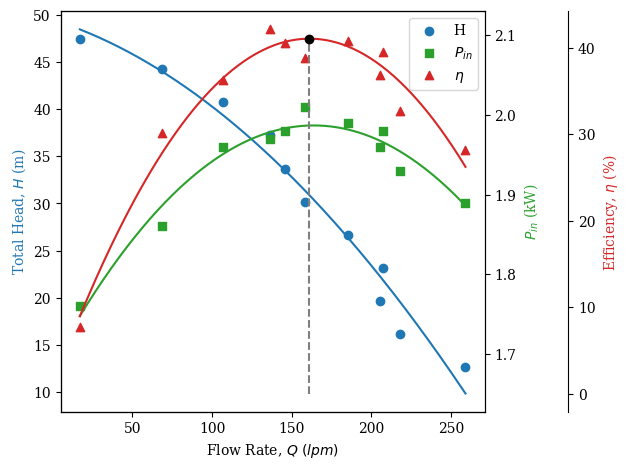

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize_scalar

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif']

# Data
Q = np.array([258.72, 217.71, 205.338, 207.044, 185.45, 158.53, 145.66, 136.25, 106.71, 68.80, 17.37])

H = np.array([12.6, 16.13, 19.63, 23.145, 26.66, 30.17, 33.687, 37.2, 40.72, 44.23, 47.47])
# Output power Pout (kW)
# Pout = np.array([0.533, 0.631, 0.723, 0.783, 0.811,
#                  0.781, 0.802, 0.83 , 0.71 , 0.56 , 0.136])
Pin = np.array([1.89, 1.93, 1.96, 1.98, 1.99, 2.01, 1.98, 1.97, 1.96, 1.86, 1.76])

# Efficiency η (%)
Efficiency = np.array([28.20, 32.68, 36.89, 39.55, 40.74,
                38.86, 40.52, 42.13, 36.22, 30.11,  7.72])

# Curve fits (2nd degree polynomial)
coeffs_H = np.polyfit(Q, H, 2)
coeffs_Pin = np.polyfit(Q, Pin, 2)
coeffs_Eff = np.polyfit(Q, Efficiency, 2)

poly_H = np.poly1d(coeffs_H)
poly_Pin = np.poly1d(coeffs_Pin)
poly_Eff = np.poly1d(coeffs_Eff)

# Fine Q for smooth curves
Q_fit = np.linspace(np.floor(Q.min()), np.ceil(Q.max()), 200)

# Create figure and axes
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 60))

# Plot data points
ax1.scatter(Q, H, color='tab:blue', marker='o', label='H')
ax2.scatter(Q, Pin, color='tab:green', marker='s', label='$P_{in}$')
ax3.scatter(Q, Efficiency, color='tab:red', marker='^', label='$\\eta$')

# Plot fitted curves
ax1.plot(Q_fit, poly_H(Q_fit), color='tab:blue', linestyle='-')
ax2.plot(Q_fit, poly_Pin(Q_fit), color='tab:green', linestyle='-')
ax2.set_aspect(500)
ax3.plot(Q_fit, poly_Eff(Q_fit), color='tab:red', linestyle='-')



# --- 2) Define the “negative” of your fitted function:
f_neg = lambda xx: -p(xx)

# --- 3) Call minimize_scalar on f_neg, bounded to your data range:
res = minimize_scalar(
    f_neg, 
    bounds=(Q.min(), Q.max()), 
    method='bounded'
)

# --- 4) Extract the maximizer and max value:
x_max = res.x
y_max = p(x_max)
print(f"Eff Maximum at x = {x_max:.4f}, y = {y_max:.4f}")

plt.scatter([x_max], [y_max], color='black', zorder=5, marker='o')



plt.vlines(x_max, 
           ymin=0,  # start of the line
           ymax=y_max + 0.1,   # end of the line
           colors='gray', 
           linestyles='--',
           )




# Labels
ax1.set_xlabel('Flow Rate, $Q$ $(lpm)$')
ax1.set_ylabel('Total Head, $H$ (m)', color='tab:blue')
ax2.set_ylabel('$P_{in}$ (kW)', color='tab:green')
ax3.set_ylabel('Efficiency, $\\eta$ (%) ', color='tab:red')

# Legends
lines = []
labels = []
for ax in [ax1, ax2, ax3]:
    l, lbl = ax.get_legend_handles_labels()
    lines += l
    labels += lbl
ax1.legend(lines, labels, loc='best')

# # Add Gridlines
# plt.grid(which='both', axis='both', linestyle='-', linewidth=0.5)

# plt.title('H, Pout, and Efficiency vs Q with Curve Fits')

plt.tight_layout()
plt.savefig('submersible_pump_characteristics.png', dpi=600)
plt.show()


In [39]:
poly_H(x_max)

np.float64(30.865580517545034)